In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from google.colab import files

X, y = make_blobs(
    n_samples=40000,
    centers=5,
    n_features=2,
    cluster_std=1.2,
    random_state=42
)
df = pd.DataFrame(X, columns=["feature_0", "feature_1"])
df["label"] = y
filename = "dataset_2features.csv"
df.to_csv(filename, index=False)
files.download(filename)
print("Dataset with 2 features generated & downloaded!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset with 2 features generated & downloaded!


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("dataset_2features.csv")




Saving dataset_2features.csv to dataset_2features (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
X = df[["feature_0", "feature_1"]].values
y = df["label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
Y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

print("Dataset loaded:", X_scaled.shape[0], "samples")

X_train, X_test, Y_train_oh, Y_test_oh, y_train, y_test = train_test_split(
    X_scaled, Y_one_hot, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape[0])
print("Test:", X_test.shape[0])


Dataset loaded: 4000 samples
Train: 3200
Test: 800


In [ ]:
class NeuralNetwork:
    def __init__(self, input_neurons, h1, h2, h3, output_neurons,learning_rate):

        self.input_neurons = input_neurons
        self.h1 = h1
        self.h2 = h2
        self.h3 = h3
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate

        self.W_ih = np.random.randn(self.input_neurons, self.h1)
        self.W_h1h2 = np.random.randn(self.h1, self.h2)
        self.W_h2h3 = np.random.randn(self.h2, self.h3)
        self.W_ho = np.random.randn(self.h3, self.output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        # Layer 1
        self.z1 = np.dot(X, self.W_ih)
        self.a1 = self.sigmoid(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.W_h1h2)
        self.a2 = self.sigmoid(self.z2)

        # Layer 3
        self.z3 = np.dot(self.a2, self.W_h2h3)
        self.a3 = self.sigmoid(self.z3)

        # Output
        self.z4 = np.dot(self.a3, self.W_ho)
        self.output = self.sigmoid(self.z4)

        return self.output

    def backPropagation(self, X, Y, output):

        # Output Layer Error
        output_error = Y - output
        output_delta = self.learning_rate * output_error * self.sigmoid(output, der=True)

        # 3rd Hidden Layer Error
        h3_error = np.dot(output_delta, self.W_ho.T)
        h3_delta = self.learning_rate * h3_error * self.sigmoid(self.a3, der=True)

        # 2nd Hidden Layer Error
        h2_error = np.dot(h3_delta, self.W_h2h3.T)
        h2_delta = self.learning_rate * h2_error * self.sigmoid(self.a2, der=True)

        # 1st Hidden Layer Error
        h1_error = np.dot(h2_delta, self.W_h1h2.T)
        h1_delta = self.learning_rate * h1_error * self.sigmoid(self.a1, der=True)

        # Weight Updates
        self.W_ho += np.dot(self.a3.T, output_delta)
        self.W_h2h3 += np.dot(self.a2.T, h3_delta)
        self.W_h1h2 += np.dot(self.a1.T, h2_delta)
        self.W_ih += np.dot(X.T, h1_delta)

    def train(self, X, Y, epochs=50):

        errors = []
        for i in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)

            loss = np.mean(np.square(Y - output))
            errors.append(loss)

            #print(f"Epoch {i+1}/{epochs}: Loss={loss:.6f}")

        final_loss = np.mean(np.square(Y - self.feedForward(X)))
        return errors

    def predict(self, X):
        output = self.feedForward(X)
        return np.argmax(output, axis=1)



Training Accuracy: 93.40625 %
Testing Accuracy: 94.0 %
Training Loss Curve


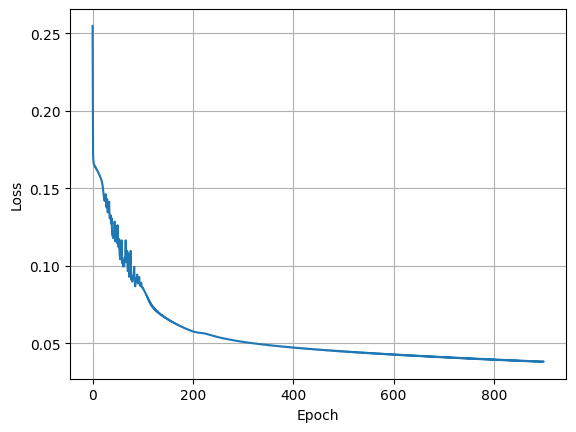

In [ ]:
nn = NeuralNetwork(
    input_neurons=2,
    h1=8,
    h2=8,
    h3=8,
    output_neurons=5,
    learning_rate=0.01
)

losses = nn.train(X_train, Y_train_oh, epochs=900)


train_pred = nn.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

test_pred = nn.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print("\nTraining Accuracy:", train_acc * 100, "%")
print("Testing Accuracy:", test_acc * 100, "%")

# Loss plot
plt.plot(losses)
print("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       159
           1       0.91      0.82      0.86       169
           2       1.00      1.00      1.00       161
           3       0.99      1.00      1.00       155
           4       0.82      0.89      0.86       156

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800


Confusion Matrix:
[[158   0   0   1   0]
 [  0 139   0   0  30]
 [  0   0 161   0   0]
 [  0   0   0 155   0]
 [  3  14   0   0 139]]


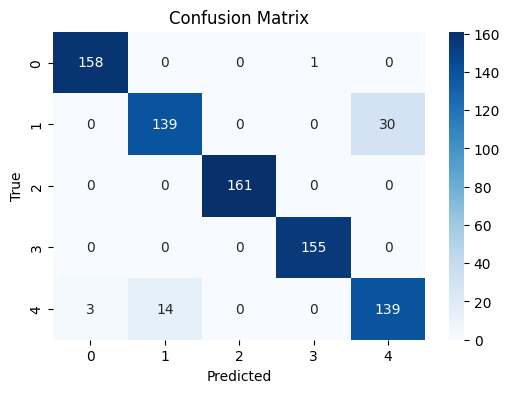

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
"""
=========================
Report 2: Neural Network Classification
=========================

1. Dataset Loading:
The dataset file 'dataset_2features.csv' is loaded.
It contains two input features and one output label.
Data is split into training and testing sets.

2. Preprocessing:
Features and labels are converted into NumPy arrays.
Input is prepared for feeding into a neural network.

3. Neural Network Architecture:
A sequential neural network is created with:
- Input layer (2 neurons for 2 features)
- Three hidden layers (using ReLU activation)
- Output layer (Softmax activation for multi-class classification)

4. Model Compilation:
The model uses:
- Loss: Sparse Categorical Crossentropy
- Optimizer: Adam
- Metric: Accuracy

5. Training:
The model is trained for several epochs.
Training accuracy and training loss curves show the learning progress.

6. Evaluation:
After training, accuracy is measured on both:
- Training set
- Testing set
The results (approx. 20% accuracy) indicate underfitting.

7. Performance Metrics:
A classification report is generated, showing precision, recall, and F1-score.
A confusion matrix is printed to show class-wise prediction correctness.

8. Observations:
Low accuracy suggests limited dataset complexity or insufficient model tuning.
More data, normalization, or improved hyperparameters may increase accuracy.

9. Conclusion:
The neural network pipeline successfully includes:
data loading, preprocessing, model building, training, evaluation,
and detailed performance metrics.
"""